C:\Users\Rylan\AppData\Local\Temp\ipykernel_29556\4246464535.py:22: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  thresh1 = sp.ndimage.filters.gaussian_filter(thresh1, (2,0))


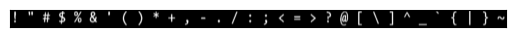

In [124]:
import cv2 as cv
import numpy as np
import scipy as sp
import os
from matplotlib import pyplot as plt

key = ['A', 'a', 'B', 'b', 'C', 'c', 'D', 'd', 'E', \
       'e', 'F', 'f', 'G', 'g', 'H', 'h', 'I', 'i', 'J', \
        'j', 'K', 'k', 'L', 'l', 'M', 'm', 'N', 'n', 'O', \
            'o', 'P', 'p', 'Q', 'q', 'R', 'r', 'S', 's', \
                'T', 't', 'U', 'u', 'V', 'v', 'W', 'w', \
                    'X', 'x', 'Y', 'y', 'Z', 'z', '!', '#', \
                    '$', '%', '&', "'", '(', ')', '*', '+', \
                        ',', '-', '.', '/', ':', ';', '<', '=', \
                            '>', '?', '@', '[', '\\', ']', 
                            '^', '_', '`', '{', '|', '}', '~']

def get_characters(image, folder = None, offset = 0, stop = -1):
    img = cv.imread(image, cv.IMREAD_GRAYSCALE)
    plt.imshow(img,'gray',vmin=0,vmax=255)
    _, thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
    thresh1 = sp.ndimage.filters.gaussian_filter(thresh1, (2,0))




    plt.imshow(thresh1,'gray',vmin=0,vmax=255)
    plt.xticks([]),plt.yticks([])
    contours, _ = cv.findContours(thresh1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)


    contours = sorted(contours, key=lambda c: cv.boundingRect(c)[0])
    chars = []
    for i, c in enumerate(contours):
        if (i == stop):
            break

        x, y, w, h = cv.boundingRect(c)
        char = img[y:y+h, x - 1:x + w + 1]
        chars.append(char)

        if folder != None:
            path = folder + 'char_'+ str(i + offset)+'.png'
            cv.imwrite(path, char)

    return chars


get_characters('image1.png', './bag/')
get_characters('image3.png', './bag/', 51)




#https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html
def compare(char1, char2): 
    sift = cv.SIFT_create()
    bf = cv.BFMatcher()

    keypoints1, descriptors1 = sift.detectAndCompute(char1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(char2, None)

    matches = bf.knnMatch(descriptors1, descriptors2, k=2) #k-best matches

    good_matches = []
    for m, n in matches:
        if m.distance < .65 * n.distance: #?Ratio Test
            good_matches.append(m)

    similarity = len(good_matches) / max(len(keypoints1), len(keypoints2))

    return similarity


def rescale_by_height(image, target_height, method=cv.INTER_LANCZOS4):
    w = int(round(target_height * image.shape[1] / image.shape[0]))
    return cv.resize(image, (w, target_height), interpolation=method)

def best_match(img, bag):
    plt.imshow(img, cmap='grey')
    list = np.zeros(83)
    for i in range(83):
        cmp = cv.imread(('./bag/char_' + str(i) + '.png'), cv.IMREAD_GRAYSCALE)
        list[i] = compare(cmp, img)
    return np.argmax(list), list
    

def to_text(characters):
    out = ''
    for char in characters:
        out += key[best_match(char, './bag')[0]]
    return out

C:\Users\Rylan\AppData\Local\Temp\ipykernel_29556\4246464535.py:22: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  thresh1 = sp.ndimage.filters.gaussian_filter(thresh1, (2,0))


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\features2d\src\matchers.cpp:761: error: (-215:Assertion failed) _queryDescriptors.type() == trainDescType in function 'cv::BFMatcher::knnMatchImpl'


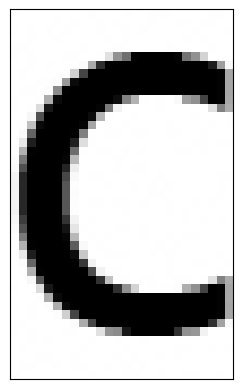

In [125]:
t1 = cv.imread('./bag/char_9.png', cv.IMREAD_GRAYSCALE)
t2 = cv.imread('./saved/char_0.png', cv.IMREAD_GRAYSCALE)

t1 = rescale_by_height(t1, 720)
t2 = rescale_by_height(t2, 720)

test1 = get_characters('image2.png', stop=10)

test = compare(t1, t2)

# ind1 = best_match(t1, './bag/')
# print(ind1)

# ind2 = best_match(t2, './bag/')
# print(ind2)

# t2f = cv.GaussianBlur(t2, (27, 27), 0)
# ind2f = best_match(t2f, './bag/')
# print(ind2f)

text = to_text(test1)
print(text)

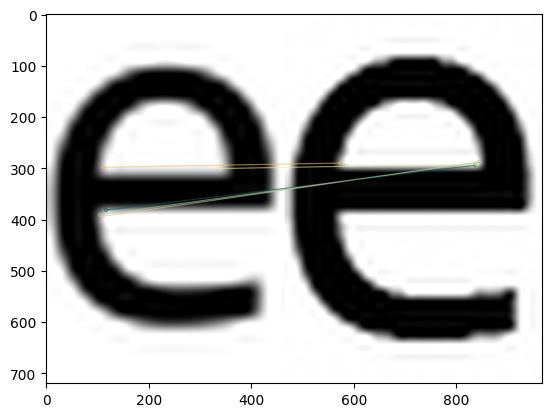

(<matplotlib.image.AxesImage at 0x1b0b1ec3050>, None)

In [51]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('./bag/char_9.png',cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread('./saved/char_3.png',cv.IMREAD_GRAYSCALE) # trainImage
# img1 = cv.imread('./light_cubes_base',cv.IMREAD_GRAYSCALE) # queryImage
# img2 = cv.imread('./light_cubes_sm',cv.IMREAD_GRAYSCALE) # queryImage

def rescale_by_height(image, target_height, method=cv.INTER_LANCZOS4):
    """Rescale `image` to `target_height` (preserving aspect ratio)."""
    w = int(round(target_height * image.shape[1] / image.shape[0]))
    return cv.resize(image, (w, target_height), interpolation=method)


img1 = rescale_by_height(img1, 720)
img2 = rescale_by_height(img2, 720)

# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()